In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, auc, f1_score, precision_recall_curve, log_loss, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.multiclass import OneVsRestClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
with open('saved_usable_player_info.pickle', 'rb') as handle:
    player_info = pickle.load(handle)

In [3]:
names = ['%Astd_for3FGM', '%Astd_forFGM', '%_3PA_corner', '%_FGA_dunks',
       '%_shots_2PA', '%_shots_2PM', '2P%', '2PA%_0-3', '2PA%_10-16',
       '2PA%_16<3', '2PA%_3-10', '2PA/G', '2PM%_0-3', '2PM%_10-16',
       '2PM%_16<3', '2PM%_3-10', '2PM/G', '3P%', '3PA%', '3PA/G', '3PAr',
       '3PM%', '3PM%_corner', '3PM/G', 'AST%', 'AST/G', 'Age', 'Age2', 'Age3',
       'BLK%', 'BLK/G', 'BPM', 'Birth_Year', 'College', 'Country', 'DBPM',
       'DRB%', 'DRB/G', 'DWS', 'D_of_B', 'Dist', 'Exp', 'Experience', 'FG%2',
       'FT%', 'FTA/G', 'FTM/G', 'FTr', 'Height', 'Name', 'OBPM', 'ORB%',
       'ORB/G', 'OWS', 'PER', 'PF/G', 'PTS/G', 'Position', 'STL%', 'STL/G',
       'Season', 'TOV%', 'TOV/G', 'TRB%', 'TRB/G', 'TS%', 'Team',
       'Team_Number', 'USG%', 'VORP', 'WS', 'WS/48', 'Weight', 'dunks', 'eFG%',
       'fg%', 'fg_att/G', 'fg_made/G', 'games_played', 'games_played2',
       'games_played3', 'games_started', 'heaves_att', 'heaves_made', 'height',
       'min_played/G', 'min_played_total', 'min_played_total2', 'position',
       'salary', 'weight']

In [4]:
clean_player_df = pd.DataFrame(player_info, index=names)
clean_player_df = clean_player_df.T
clean_player_df.head()

,%Astd_for3FGM,%Astd_forFGM,%_3PA_corner,%_FGA_dunks,%_shots_2PA,%_shots_2PM,2P%,2PA%_0-3,2PA%_10-16,2PA%_16<3,...,games_started,heaves_att,heaves_made,height,min_played/G,min_played_total,min_played_total2,position,salary,weight
ATL_1969_Bill Bridges,NA,NA,NA,NA,NA,NA,14.2,NA,NA,NA,...,NA,NA,NA,6-6,36.6,3.7,NA,PF,NA,228
ATL_1969_Dennis Hamilton,NA,NA,NA,NA,NA,NA,1.2,NA,NA,NA,...,NA,NA,NA,6-8,5.6,0.1,NA,PF,NA,210
ATL_1969_Don Ohl,NA,NA,NA,NA,NA,NA,2.2,NA,NA,NA,...,NA,NA,NA,6-3,26.3,1.3,NA,SG,NA,190
ATL_1969_Dwight Waller,NA,NA,NA,NA,NA,NA,0.9,NA,NA,NA,...,NA,NA,NA,6-6,2.6,0,NA,F,NA,220
ATL_1969_George Lehmann,NA,NA,NA,NA,NA,NA,0.8,NA,NA,NA,...,NA,NA,NA,6-0,12.5,0.1,NA,PG,NA,180


### A Little More Cleaning of the Data

In [5]:
# Dropping other unnecessary columns in the dataframe

clean_player_df = clean_player_df.drop('Age2', axis=1)
clean_player_df = clean_player_df.drop('Age3', axis=1)
clean_player_df = clean_player_df.drop('games_played2', axis=1)
clean_player_df = clean_player_df.drop('games_played3', axis=1)
clean_player_df = clean_player_df.drop('min_played_total2', axis=1)

In [6]:
clean_player_df.shape

(18767, 86)

In [7]:
# Grabbing only the players in the dataframe that have a salary value

salary_player_df = clean_player_df[clean_player_df.salary != 'NA']

In [8]:
salary_player_df.shape

(11465, 86)

In [9]:
salary_player_df.columns

Index(['%Astd_for3FGM', '%Astd_forFGM', '%_3PA_corner', '%_FGA_dunks',
       '%_shots_2PA', '%_shots_2PM', '2P%', '2PA%_0-3', '2PA%_10-16',
       '2PA%_16<3', '2PA%_3-10', '2PA/G', '2PM%_0-3', '2PM%_10-16',
       '2PM%_16<3', '2PM%_3-10', '2PM/G', '3P%', '3PA%', '3PA/G', '3PAr',
       '3PM%', '3PM%_corner', '3PM/G', 'AST%', 'AST/G', 'Age', 'BLK%', 'BLK/G',
       'BPM', 'Birth_Year', 'College', 'Country', 'DBPM', 'DRB%', 'DRB/G',
       'DWS', 'D_of_B', 'Dist', 'Exp', 'Experience', 'FG%2', 'FT%', 'FTA/G',
       'FTM/G', 'FTr', 'Height', 'Name', 'OBPM', 'ORB%', 'ORB/G', 'OWS', 'PER',
       'PF/G', 'PTS/G', 'Position', 'STL%', 'STL/G', 'Season', 'TOV%', 'TOV/G',
       'TRB%', 'TRB/G', 'TS%', 'Team', 'Team_Number', 'USG%', 'VORP', 'WS',
       'WS/48', 'Weight', 'dunks', 'eFG%', 'fg%', 'fg_att/G', 'fg_made/G',
       'games_played', 'games_started', 'heaves_att', 'heaves_made', 'height',
       'min_played/G', 'min_played_total', 'position', 'salary', 'weight'],
      dtype='object

In [10]:
usable_player_df = salary_player_df.copy()

In [11]:
# Dropping other unnecessary columns in the dataframe

droppables = ['position', 'height', 'weight', 'D_of_B', 'College', 'Country', 'Exp', 'Name', 'Team', 'FG%2']

for i in droppables:
    usable_player_df = usable_player_df.drop(i, axis=1)

In [12]:
usable_player_df.columns

Index(['%Astd_for3FGM', '%Astd_forFGM', '%_3PA_corner', '%_FGA_dunks',
       '%_shots_2PA', '%_shots_2PM', '2P%', '2PA%_0-3', '2PA%_10-16',
       '2PA%_16<3', '2PA%_3-10', '2PA/G', '2PM%_0-3', '2PM%_10-16',
       '2PM%_16<3', '2PM%_3-10', '2PM/G', '3P%', '3PA%', '3PA/G', '3PAr',
       '3PM%', '3PM%_corner', '3PM/G', 'AST%', 'AST/G', 'Age', 'BLK%', 'BLK/G',
       'BPM', 'Birth_Year', 'DBPM', 'DRB%', 'DRB/G', 'DWS', 'Dist',
       'Experience', 'FT%', 'FTA/G', 'FTM/G', 'FTr', 'Height', 'OBPM', 'ORB%',
       'ORB/G', 'OWS', 'PER', 'PF/G', 'PTS/G', 'Position', 'STL%', 'STL/G',
       'Season', 'TOV%', 'TOV/G', 'TRB%', 'TRB/G', 'TS%', 'Team_Number',
       'USG%', 'VORP', 'WS', 'WS/48', 'Weight', 'dunks', 'eFG%', 'fg%',
       'fg_att/G', 'fg_made/G', 'games_played', 'games_started', 'heaves_att',
       'heaves_made', 'min_played/G', 'min_played_total', 'salary'],
      dtype='object')

In [13]:
# Rearranging the column names by basic stats, advanced stats, and shooting stats to better divide up the dataframe

usable_player_df = usable_player_df[['Team_Number', 'Season', 'Position', 'Height', 'Weight', 'Birth_Year', 
                                     'Experience', 'Age', 'games_played', 'games_started', 'min_played/G', 
                                     'min_played_total', 'fg_made/G', 'fg_att/G', 'fg%', '3PM/G', '3PA/G', '3P%', 
                                     '2PM/G', '2PA/G', '2P%', 'eFG%', 'FTM/G', 'FTA/G', 'FT%','ORB/G', 'DRB/G', 
                                     'TRB/G', 'AST/G', 'STL/G', 'BLK/G', 'TOV/G', 'PF/G', 'PTS/G', 'PER', 'TS%', 
                                     '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 
                                     'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Dist', 
                                     '%_shots_2PA', '2PA%_0-3', '2PA%_3-10', '2PA%_10-16', '2PA%_16<3', '3PA%', 
                                     '%_shots_2PM', '2PM%_0-3', '2PM%_3-10', '2PM%_10-16', '2PM%_16<3', '3PM%', 
                                     '%Astd_forFGM', '%_FGA_dunks', 'dunks', '%Astd_for3FGM', '%_3PA_corner', 
                                     '3PM%_corner', 'heaves_att', 'heaves_made', 'salary']]

In [14]:
# Converting all the salary values from str types to int types

usable_player_df['salary'] = list(map(lambda x: int(x), usable_player_df.salary))

In [15]:
basicstats_player_df = usable_player_df.copy()
basicandadvanced_player_df = usable_player_df.copy()
all_player_df = usable_player_df.copy()

In [16]:
# Creating a basic stats only player dataframe

basicstats_player_df = basicstats_player_df.iloc[:,np.r_[:34,-1]]

In [17]:
basicstats_player_df.head()

,Team_Number,Season,Position,Height,Weight,Birth_Year,Experience,Age,games_played,games_started,...,ORB/G,DRB/G,TRB/G,AST/G,STL/G,BLK/G,TOV/G,PF/G,PTS/G,salary
ATL_1985_Cliff Levingston,285,1985,4,80,210,1961,2,24,74,53,...,3.1,4.5,7.6,1.4,0.9,0.9,1.8,3.1,9.8,200000
ATL_1985_Doc Rivers,285,1985,1,76,185,1961,1,23,69,58,...,1,2.1,3.1,5.9,2.4,0.8,2.6,3.6,14.1,105000
ATL_1985_Dominique Wilkins,285,1985,3,79,200,1960,2,25,81,81,...,2.8,4.1,6.9,2.5,1.7,0.7,2.8,2.1,27.4,460000
ATL_1985_Eddie Johnson,285,1985,2,74,180,1955,7,29,73,66,...,0.5,2.1,2.6,7.8,0.6,0.1,3.3,2.5,16.3,491000
ATL_1985_Randy Wittman,285,1985,2,78,210,1959,1,25,41,22,...,0.4,1.4,1.8,3,0.7,0.2,1.4,1.4,9.9,170000


In [18]:
basicstats_player_df.shape

(11465, 35)

In [19]:
# Creating a basic stats and advanced stats player dataframe

basicandadvanced_player_df = basicandadvanced_player_df.iloc[:,np.r_[:54,-1]]

In [20]:
basicandadvanced_player_df.shape

(11465, 55)

In [21]:
basicandadvanced_player_df.head()

,Team_Number,Season,Position,Height,Weight,Birth_Year,Experience,Age,games_played,games_started,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,salary
ATL_1985_Cliff Levingston,285,1985,4,80,210,1961,2,24,74,53,...,16,2,2.8,4.7,0.113,0.1,2,2.1,2.1,200000
ATL_1985_Doc Rivers,285,1985,1,76,185,1961,1,23,69,58,...,20.2,3.4,3,6.3,0.143,2.1,1.8,3.9,3.2,105000
ATL_1985_Dominique Wilkins,285,1985,3,79,200,1960,2,25,81,81,...,32.5,4.1,3.5,7.6,0.121,2,-0.9,1.1,2.4,460000
ATL_1985_Eddie Johnson,285,1985,2,74,180,1955,7,29,73,66,...,23.3,2.8,1.4,4.2,0.084,1.2,-2.5,-1.2,0.4,491000
ATL_1985_Randy Wittman,285,1985,2,78,210,1959,1,25,41,22,...,15.1,0.9,0.7,1.6,0.065,-1,-0.9,-1.9,0,170000


In [22]:
# Creating a player dataframe that has all the basic stats, advanced stats, and shooting stats filled out

all_player_df = all_player_df[all_player_df.Dist != 'NA']

In [23]:
all_player_df.shape

(7060, 76)

In [24]:
# Getting rid of the random NA values in player's statistics and changing them to 0 because those players didn't 
#   perform those stats in the season (for instance, making/attempting a three pointer)

for i in range(0,len(basicstats_player_df)):
    for j in range(0,len(basicstats_player_df.columns)):
        if basicstats_player_df.iloc[i,j] == 'NA':
            basicstats_player_df.iloc[i,j] = 0

In [25]:
for i in range(0,len(basicandadvanced_player_df)):
    for j in range(0,len(basicandadvanced_player_df.columns)):
        if basicandadvanced_player_df.iloc[i,j] == 'NA':
            basicandadvanced_player_df.iloc[i,j] = 0

In [26]:
for i in range(0,len(all_player_df)):
    for j in range(0,len(all_player_df.columns)):
        if all_player_df.iloc[i,j] == 'NA':
            all_player_df.iloc[i,j] = 0

## Exploratory Analysis on all Players

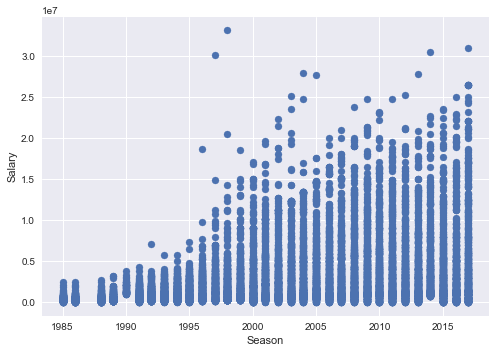

In [27]:
plt.scatter(basicstats_player_df.Season, basicstats_player_df.salary)
plt.xlabel('Season')
plt.ylabel('Salary')

In [28]:
high_roller_salarys = basicstats_player_df.salary[basicstats_player_df.salary > 15000000].tolist()
high_rollers = basicstats_player_df.index[basicstats_player_df.salary > 15000000].tolist()

rolling_deep = {}

for i in range(0,len(high_rollers)):
    rolling_deep[high_rollers[i]] = high_roller_salarys[i]

high_roller_season = []
for i in high_rollers:
    high_roller_season.append(i[4:8])

In [ ]:
print (rolling_deep)

In [ ]:
print (high_roller_season)

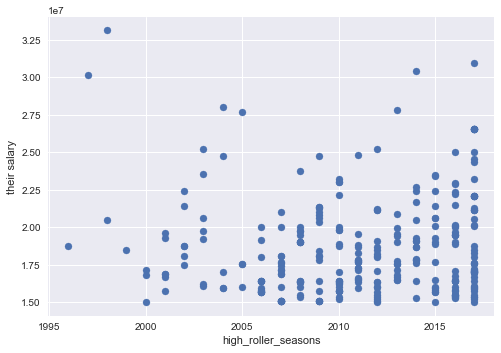

In [29]:
plt.scatter(high_roller_season, high_roller_salarys)
plt.xlabel('high_roller_seasons')
plt.ylabel('their salary')

In [30]:
print (basicstats_player_df.index[np.logical_and(basicstats_player_df.salary > 25000000, basicstats_player_df.Season > 2005)].tolist())
print (basicstats_player_df.salary[np.logical_and(basicstats_player_df.salary > 25000000, basicstats_player_df.Season > 2005)].tolist())


['BOS_2017_Al Horford', 'CLE_2017_LeBron James', 'GSW_2017_Kevin Durant', 'HOU_2017_James Harden', 'LAL_2012_Kobe Bryant', 'LAL_2013_Kobe Bryant', 'LAL_2014_Kobe Bryant', 'MEM_2017_Mike Conley', 'OKC_2017_Russell Westbrook', 'TOR_2017_DeMar DeRozan']
[26540100, 30963450, 26540100, 26540100, 25244493, 27849149, 30453805, 26540100, 26540100, 26540100]


In [31]:
def explaining_the_data(column):
    plt.scatter(basicstats_player_df[column], basicstats_player_df.salary)
    plt.xlabel(column)
    plt.ylabel('Salary')

In [32]:
basicstats_player_df.columns

Index(['Team_Number', 'Season', 'Position', 'Height', 'Weight', 'Birth_Year',
       'Experience', 'Age', 'games_played', 'games_started', 'min_played/G',
       'min_played_total', 'fg_made/G', 'fg_att/G', 'fg%', '3PM/G', '3PA/G',
       '3P%', '2PM/G', '2PA/G', '2P%', 'eFG%', 'FTM/G', 'FTA/G', 'FT%',
       'ORB/G', 'DRB/G', 'TRB/G', 'AST/G', 'STL/G', 'BLK/G', 'TOV/G', 'PF/G',
       'PTS/G', 'salary'],
      dtype='object')

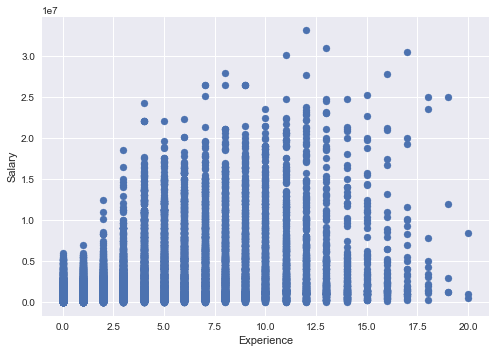

In [33]:
explaining_the_data('Experience')

### Predicting Salary based on Player's Performance

#### Linear Regression

In [34]:
X_train_basic, X_test_basic, y_train_basic, y_test_basic = train_test_split(basicstats_player_df.iloc[:,:-1], basicstats_player_df['salary'], test_size = 0.3, random_state = 42)

In [35]:
lr_model = LinearRegression()
lr_model.fit(X_train_basic, y_train_basic)

/Users/ameerbajwa/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
lr_model_pred = lr_model.predict(X_test_basic)

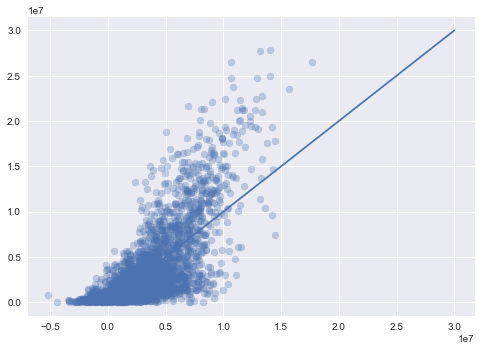

In [37]:
plt.scatter(lr_model_pred, y_test_basic, alpha=0.3)
plt.plot(np.linspace(0,30000000,1000),np.linspace(0,30000000,1000))

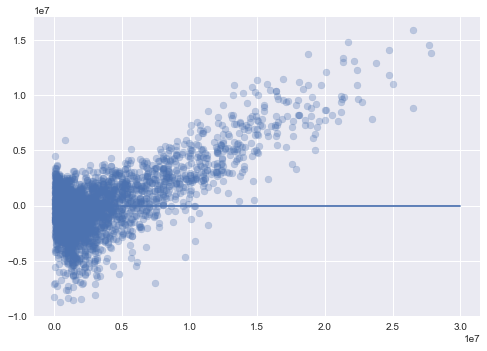

In [38]:
plt.scatter(y_test_basic.values, y_test_basic.values - lr_model_pred, alpha=.3)
plt.plot(np.linspace(0,30000000,1000),np.linspace(0,0,1000))

In [39]:
np.sqrt(np.mean((lr_model_pred - y_test_basic)**2))

2788763.3979532323

In [40]:
np.sqrt(mean_squared_error(y_test_basic, lr_model_pred)), mean_absolute_error(y_test_basic, lr_model_pred)

(2788763.3979532355, 1955778.8434804827)

In [41]:
r2_score(y_test_basic, lr_model_pred)

0.54082494800782621

#### Lasso Regularization

In [101]:
lasso_model = Lasso(alpha = 0.0001)
lasso_model.fit(X_tr, y_train_basic)

/Users/ameerbajwa/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [102]:
list(zip(X_train_basic.columns,lasso_model.coef_))

[('Team_Number', 39917.274069288083),
 ('Season', 1807020.1932413215),
 ('Position', -148620.2945963137),
 ('Height', 219592.25148673795),
 ('Weight', 271201.17644752638),
 ('Birth_Year', -590438.71248793486),
 ('Experience', 1478477.1082010919),
 ('Age', -639154.35744186305),
 ('games_played', 432738.03549944016),
 ('games_started', 448561.60078486305),
 ('min_played/G', 175851.07226293095),
 ('min_played_total', -1267699.2801578995),
 ('fg_made/G', 1862906.8017616479),
 ('fg_att/G', 493990.17439605767),
 ('fg%', 1739388.6748569852),
 ('3PM/G', 644760.57847798534),
 ('3PA/G', 1736.5251815299407),
 ('3P%', 87127.971466185671),
 ('2PM/G', -1206197.5828625134),
 ('2PA/G', 474510.98567533534),
 ('2P%', -97746.159852325291),
 ('eFG%', -1651360.0162584318),
 ('FTM/G', -185757.32426595225),
 ('FTA/G', 1100662.4129324304),
 ('FT%', 33693.921530344807),
 ('ORB/G', -158956.72609182965),
 ('DRB/G', 1724115.4482742336),
 ('TRB/G', -826341.08807569079),
 ('AST/G', 518271.281224637),
 ('STL/G', -23

In [103]:
lasso_model_pred = lasso_model.predict(X_te)

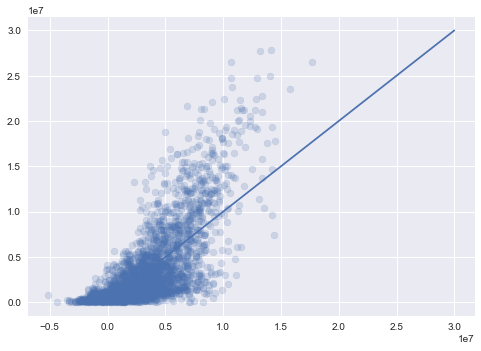

In [104]:
plt.scatter(lasso_model_pred, y_test_basic, alpha = 0.2)
plt.plot(np.linspace(0,30000000,1000), np.linspace(0,30000000,1000))

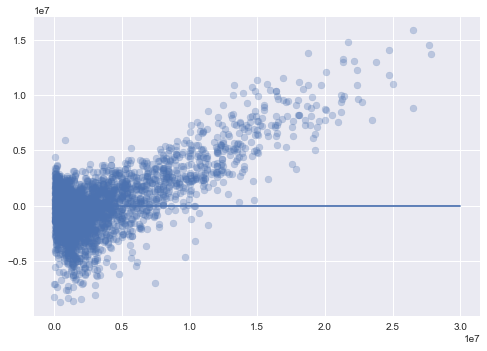

In [105]:
plt.scatter(y_test_basic.values, y_test_basic.values - lasso_model_pred, alpha=.3)
plt.plot(np.linspace(0,30000000,1000),np.linspace(0,0,1000))

In [106]:
np.sqrt(mean_squared_error(y_test_basic, lasso_model_pred)), mean_absolute_error(y_test_basic, lasso_model_pred)

(2787734.1254492211, 1954942.2924490653)

In [107]:
r2_score(y_test_basic, lasso_model_pred)

0.54116382870286939

#### Ridge Regularization

In [108]:
ridge_model = Ridge(alpha = 0.001)
ridge_model.fit(X_tr, y_train_basic)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [109]:
list(zip(X_train_basic.columns,ridge_model.coef_))

[('Team_Number', 39159.571166257556),
 ('Season', 1927680.9832689408),
 ('Position', -150165.8712599898),
 ('Height', 219850.66783929468),
 ('Weight', 271307.1243438755),
 ('Birth_Year', -726613.17323428858),
 ('Experience', 1477421.9809477658),
 ('Age', -695867.4278126047),
 ('games_played', 433512.69343960518),
 ('games_started', 449039.93740626675),
 ('min_played/G', 178512.70206103424),
 ('min_played_total', -1270400.1171089732),
 ('fg_made/G', 211593.9121619392),
 ('fg_att/G', -168551.0666808183),
 ('fg%', 1742495.3927654375),
 ('3PM/G', 569459.68176641501),
 ('3PA/G', 217115.92685741221),
 ('3P%', 87013.250417605988),
 ('2PM/G', -883645.52306043101),
 ('2PA/G', 1046077.4013243086),
 ('2P%', -96601.714501311013),
 ('eFG%', -1656437.2663643658),
 ('FTM/G', -606110.22500816942),
 ('FTA/G', 1094060.855933418),
 ('FT%', 32712.191613271796),
 ('ORB/G', 122172.37457872712),
 ('DRB/G', 2304756.2279016534),
 ('TRB/G', -1648600.1141515691),
 ('AST/G', 516748.31822881405),
 ('STL/G', -23374

In [110]:
ridge_model_pred = ridge_model.predict(X_te)

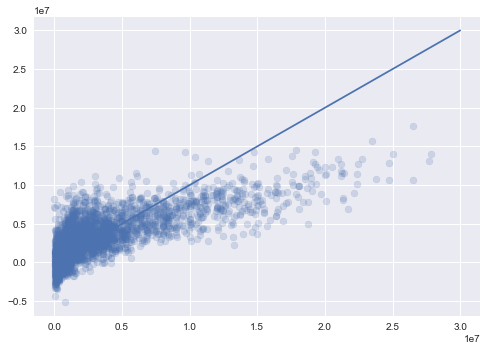

In [111]:
plt.scatter(y_test_basic, ridge_model_pred, alpha = 0.2)
plt.plot(np.linspace(0,30000000,1000), np.linspace(0,30000000,1000))

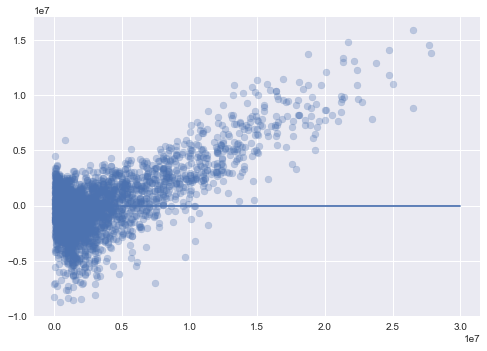

In [112]:
plt.scatter(y_test_basic.values, y_test_basic.values - ridge_model_pred, alpha=.3)
plt.plot(np.linspace(0,30000000,1000),np.linspace(0,0,1000))

In [113]:
np.sqrt(mean_squared_error(y_test_basic, ridge_model_pred)), mean_absolute_error(y_test_basic, ridge_model_pred)

(2788762.52387641, 1955777.5529294147)

In [114]:
r2_score(y_test_basic, ridge_model_pred)

0.54082523584451336

#### Cross-Validation

In [115]:
alphavec = 10**np.linspace(-3,2,27)

In [116]:
lassocv_model = LassoCV(alphas = alphavec, cv=5)
lassocv_model.fit(X_tr,y_train_basic)

/Users/ameerbajwa/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ameerbajwa/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=array([  1.00000e-03,   1.55707e-03,   2.42446e-03,   3.77505e-03,
         5.87802e-03,   9.15247e-03,   1.42510e-02,   2.21898e-02,
         3.45511e-02,   5.37984e-02,   8.37678e-02,   1.30432e-01,
         2.03092e-01,   3.16228e-01,   4.92388e-01,   7.66682e-01,
         1.19378e+00,   1.85879e+00,   2.89427e+00,   4.50657e+00,
         7.01704e+00,   1.09260e+01,   1.70125e+01,   2.64897e+01,
         4.12463e+01,   6.42233e+01,   1.00000e+02]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [117]:
list(zip(X_train_basic.columns,lassocv_model.coef_))

[('Team_Number', 40019.065858867325),
 ('Season', 1655839.8776962657),
 ('Position', -146999.53899866925),
 ('Height', 218425.67297118469),
 ('Weight', 270656.01841151668),
 ('Birth_Year', -419464.81420200464),
 ('Experience', 1478994.7616463618),
 ('Age', -567868.14097351744),
 ('games_played', 430302.58151263447),
 ('games_started', 447275.83447897562),
 ('min_played/G', 173477.86120784422),
 ('min_played_total', -1262840.1816624005),
 ('fg_made/G', 1688176.785062325),
 ('fg_att/G', 561342.35543856851),
 ('fg%', 1732939.2664551563),
 ('3PM/G', 645657.79253237462),
 ('3PA/G', -10675.074042944558),
 ('3P%', 86696.57154430644),
 ('2PM/G', -1112090.9581613),
 ('2PA/G', 405828.51686175144),
 ('2P%', -98919.725751796723),
 ('eFG%', -1643811.935645899),
 ('FTM/G', -200143.05824934487),
 ('FTA/G', 1087162.9389867808),
 ('FT%', 33186.40159819879),
 ('ORB/G', -204748.81346439561),
 ('DRB/G', 1626727.6912261655),
 ('TRB/G', -688510.42757080065),
 ('AST/G', 517563.89831553894),
 ('STL/G', -23484

In [118]:
lassocv_model_pred = lassocv_model.predict(X_te)

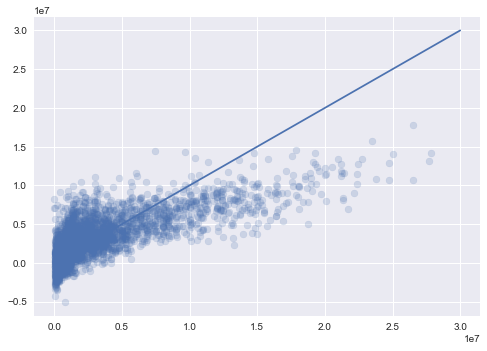

In [119]:
plt.scatter(y_test_basic, lassocv_model_pred, alpha = 0.2)
plt.plot(np.linspace(0,30000000,1000), np.linspace(0,30000000,1000))

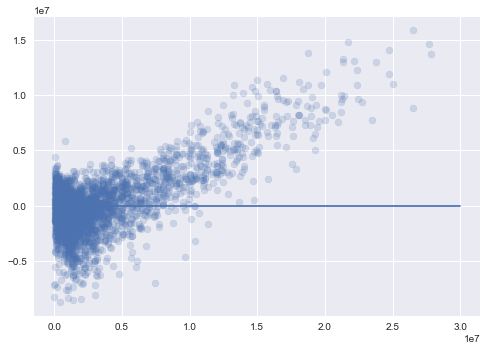

In [120]:
plt.scatter(y_test_basic.values, y_test_basic.values - lassocv_model_pred, alpha=.2)
plt.plot(np.linspace(0,30000000,1000),np.linspace(0,0,1000))

In [121]:
np.sqrt(mean_squared_error(y_test_basic, lassocv_model_pred)), mean_absolute_error(y_test_basic, lassocv_model_pred)

(2787658.0671312991, 1954777.7887994046)

In [122]:
r2_score(y_test_basic, lassocv_model_pred)

0.54118886540274935

#### Standardizing the features

In [64]:
std = StandardScaler()
std.fit(X_train_basic)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [65]:
X_tr = std.transform(X_train_basic)
X_te = std.transform(X_test_basic)

#### Random Forest Regressor

In [123]:
rf_model = RandomForestRegressor(n_estimators = 1000, min_samples_leaf=10, max_features=20, n_jobs=-1)
rf_model.fit(X_tr,y_train_basic)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=20, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [124]:
rf_model_pred = rf_model.predict(X_te)

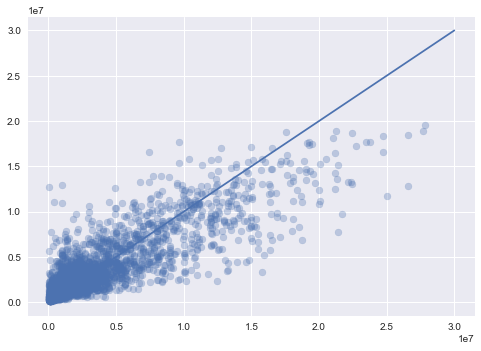

In [125]:
plt.scatter(y_test_basic, rf_model_pred, alpha = 0.3)
plt.plot(np.linspace(0,30000000,1000), np.linspace(0,30000000,1000))

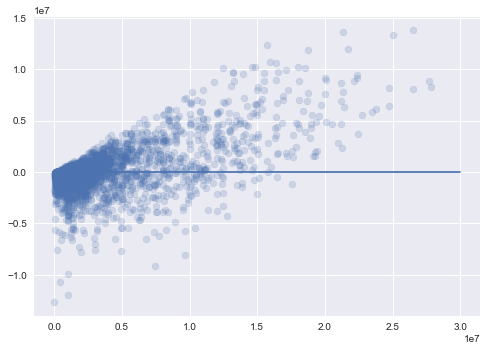

In [126]:
plt.scatter(y_test_basic.values, y_test_basic.values - rf_model_pred, alpha=.2)
plt.plot(np.linspace(0,30000000,1000),np.linspace(0,0,1000))

In [127]:
np.sqrt(mean_squared_error(y_test_basic, rf_model_pred)), mean_absolute_error(y_test_basic, rf_model_pred)

(2130003.6504601995, 1283641.1622576071)

In [128]:
r2_score(y_test_basic, rf_model_pred)

0.73213520437687063

#### Gradient Boosted Regressor

In [130]:
gb_model = GradientBoostingRegressor(n_estimators = 1000, min_samples_leaf=10, max_features=20)
gb_model.fit(X_tr, y_train_basic)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=20,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=10, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [131]:
gb_model_pred = gb_model.predict(X_te)

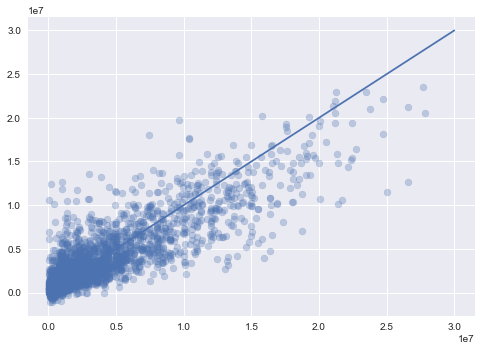

In [132]:
plt.scatter(y_test_basic, gb_model_pred, alpha = 0.3)
plt.plot(np.linspace(0,30000000,1000), np.linspace(0,30000000,1000))

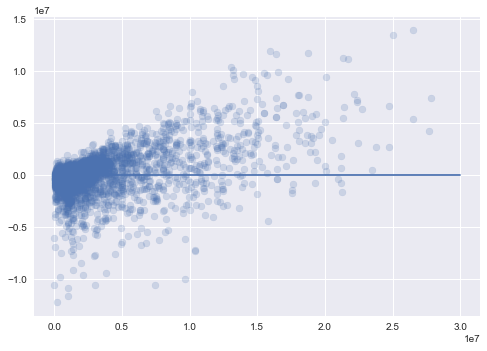

In [133]:
plt.scatter(y_test_basic.values, y_test_basic.values - gb_model_pred, alpha=.2)
plt.plot(np.linspace(0,30000000,1000),np.linspace(0,0,1000))

In [134]:
np.sqrt(mean_squared_error(y_test_basic, gb_model_pred)), mean_absolute_error(y_test_basic, gb_model_pred)

(2113645.9533705423, 1314953.7518273066)

In [135]:
r2_score(y_test_basic, gb_model_pred)

0.73623362589657071

In [ ]:
# Random Forest and Gradient Boosted Regressor are the best models at predicting NBA player salarys based on their
#  performance. 